In [5]:
import os
import pandas as pd
import numpy as np

# ---------- CONFIGURACIÓN ----------
# Ruta del dataset
DATASET_PATH = '/Users/joseheinz/Documents/Arbeit/G2/Silabs/PYTHON_LOG/SVM/Datasets/acceleration/Fall'

# ---------- PROCESAR TODOS LOS CSV ----------
def process_all_csvs():
    """Procesa todos los CSV en el directorio y calcula la media y desviación estándar."""
    all_data = []  # Lista para almacenar todas las filas de todos los archivos

    # Recorrer todos los archivos en el directorio
    for root, dirs, files in os.walk(DATASET_PATH):
        for file in files:
            if file.endswith(".csv"):
                file_path = os.path.join(root, file)
                print(f"Procesando archivo: {file_path}")

                # Leer CSV
                df = pd.read_csv(file_path)

                # Añadir datos al buffer (Excluir Timestamp si existe)
                if 'Timestamp' in df.columns:
                    df = df.drop(columns=['Timestamp'])  # Eliminar columna Timestamp

                all_data.append(df)

    # Concatenar todos los datos
    combined_data = pd.concat(all_data, axis=0)

    # Calcular estadísticas
    mean = combined_data.mean()
    std = combined_data.std()

    # Mostrar resultados
    print("\n--- Estadísticas Combinadas ---")
    for col in combined_data.columns:
        print(f"{col}: μ = {mean[col]:.4f}, σ = {std[col]:.4f}")

# ---------- EJECUTAR PROCESAMIENTO ----------
process_all_csvs()

Procesando archivo: /Users/joseheinz/Documents/Arbeit/G2/Silabs/PYTHON_LOG/SVM/Datasets/acceleration/Fall/data_20241228-190927.csv
Procesando archivo: /Users/joseheinz/Documents/Arbeit/G2/Silabs/PYTHON_LOG/SVM/Datasets/acceleration/Fall/data_20241228-191813.csv
Procesando archivo: /Users/joseheinz/Documents/Arbeit/G2/Silabs/PYTHON_LOG/SVM/Datasets/acceleration/Fall/data_20241228-175638.csv
Procesando archivo: /Users/joseheinz/Documents/Arbeit/G2/Silabs/PYTHON_LOG/SVM/Datasets/acceleration/Fall/data_20241228-191434.csv
Procesando archivo: /Users/joseheinz/Documents/Arbeit/G2/Silabs/PYTHON_LOG/SVM/Datasets/acceleration/Fall/data_20241228-191352.csv
Procesando archivo: /Users/joseheinz/Documents/Arbeit/G2/Silabs/PYTHON_LOG/SVM/Datasets/acceleration/Fall/data_20241228-175614.csv
Procesando archivo: /Users/joseheinz/Documents/Arbeit/G2/Silabs/PYTHON_LOG/SVM/Datasets/acceleration/Fall/data_20241228-192058.csv
Procesando archivo: /Users/joseheinz/Documents/Arbeit/G2/Silabs/PYTHON_LOG/SVM/Data

In [7]:
import os
import pandas as pd
import numpy as np

# ---------- CONFIGURACIÓN ----------
# Ruta del dataset
DATASET_PATH = '/Users/joseheinz/Documents/Arbeit/G2/Silabs/PYTHON_LOG/SVM/Datasets/acceleration/Idle'

# ---------- PROCESAR TODOS LOS CSV ----------
def process_all_csvs():
    """Procesa todos los CSV en el directorio y calcula la media y desviación estándar."""
    all_data = []  # Lista para almacenar todas las filas de todos los archivos

    # Recorrer todos los archivos en el directorio
    for root, dirs, files in os.walk(DATASET_PATH):
        for file in files:
            if file.endswith(".csv"):
                file_path = os.path.join(root, file)
                print(f"Procesando archivo: {file_path}")

                # Leer CSV
                df = pd.read_csv(file_path)

                # Añadir datos al buffer (Excluir Timestamp si existe)
                if 'Timestamp' in df.columns:
                    df = df.drop(columns=['Timestamp'])  # Eliminar columna Timestamp

                all_data.append(df)

    # Concatenar todos los datos
    combined_data = pd.concat(all_data, axis=0)

    # Calcular estadísticas
    mean = combined_data.mean()
    std = combined_data.std()

    # Mostrar resultados
    print("\n--- Estadísticas Combinadas ---")
    for col in combined_data.columns:
        print(f"{col}: μ = {mean[col]:.4f}, σ = {std[col]:.4f}")

# ---------- EJECUTAR PROCESAMIENTO ----------
process_all_csvs()

Procesando archivo: /Users/joseheinz/Documents/Arbeit/G2/Silabs/PYTHON_LOG/SVM/Datasets/acceleration/Idle/data_20241228-193550.csv
Procesando archivo: /Users/joseheinz/Documents/Arbeit/G2/Silabs/PYTHON_LOG/SVM/Datasets/acceleration/Idle/data_20241228-192855.csv
Procesando archivo: /Users/joseheinz/Documents/Arbeit/G2/Silabs/PYTHON_LOG/SVM/Datasets/acceleration/Idle/data_20241228-193431.csv
Procesando archivo: /Users/joseheinz/Documents/Arbeit/G2/Silabs/PYTHON_LOG/SVM/Datasets/acceleration/Idle/data_20241228-192930.csv
Procesando archivo: /Users/joseheinz/Documents/Arbeit/G2/Silabs/PYTHON_LOG/SVM/Datasets/acceleration/Idle/data_20241228-193635.csv
Procesando archivo: /Users/joseheinz/Documents/Arbeit/G2/Silabs/PYTHON_LOG/SVM/Datasets/acceleration/Idle/data_20241228-193137.csv
Procesando archivo: /Users/joseheinz/Documents/Arbeit/G2/Silabs/PYTHON_LOG/SVM/Datasets/acceleration/Idle/data_20241228-192957.csv
Procesando archivo: /Users/joseheinz/Documents/Arbeit/G2/Silabs/PYTHON_LOG/SVM/Data

In [64]:
import numpy as np
import pandas as pd
import os
import random

# ---------- CONFIGURACIÓN ----------
SEQ_LENGTH = 70  # Número fijo de filas
NUM_SAMPLES = 500  # Total de muestras deseadas por clase
INPUT_DIR = '/Users/joseheinz/Documents/Arbeit/G2/Silabs/PYTHON_LOG/SVM/Datasets/acceleration'
OUTPUT_DIR = '/Users/joseheinz/Documents/Arbeit/G2/Silabs/PYTHON_LOG/SVM/Datasets/acceleration'
LABELS = ['Fall', 'Idle']  # Clases

# Estadísticas para perturbaciones gaussianas
STATS = {
    'Fall': {
        'Acc_Betrag': (0.8986, 0.5154),
        'Acc_X': (39.7213, 509.6812),
        'Acc_Y': (96.3921, 518.1174),
        'Acc_Z': (83.7906, 726.1893),
        'Ori_Betrag': (0.0389, 0.0156),
        'Ori_X': (-6.3237, 28.7513),
        'Ori_Y': (-0.4472, 9.2796),
        'Ori_Z': (-1.9256, 28.3460),
    },
    'Idle': {
        'Acc_Betrag': (1.2599, 0.5463),
        'Acc_X': (81.2816, 869.2185),
        'Acc_Y': (10.1085, 785.9450),
        'Acc_Z': (-27.3421, 711.5513),
        'Ori_Betrag': (0.0375, 0.0138),
        'Ori_X': (-1.1400, 26.5281),
        'Ori_Y': (-0.5537, 10.2841),
        'Ori_Z': (-0.6054, 28.0691),
    }
}


# ---------- FUNCIÓN PARA AUMENTAR DATOS ----------
def augment_data(df, label, num_samples):
    """Genera datos aumentados aplicando ruido gaussiano (+σ o -σ)."""
    augmented_data = []

    for _ in range(num_samples):
        # Copiar los datos originales
        new_data = df.copy()

        # Aplicar ruido gaussiano por columna
        for col in STATS[label]:
            mean, std = STATS[label][col]
            noise = np.random.normal(0, std, size=SEQ_LENGTH)  # Ruido gaussiano centrado en 0 con std
            step = np.random.choice([-1, 1]) * noise  # +σ o -σ aleatorio
            new_data[col] += step  # Añadir perturbación

        augmented_data.append(new_data)

    return augmented_data


# ---------- FUNCIÓN PARA PROCESAR CADA CLASE ----------
def process_class(label):
    """Procesa cada clase, aumentando los datos existentes."""
    input_dir = os.path.join(INPUT_DIR, label)
    output_dir = os.path.join(OUTPUT_DIR, f"{label}Enlarged")  # Directorio separado por clase
    os.makedirs(output_dir, exist_ok=True)

    # Leer archivos originales
    files = [f for f in os.listdir(input_dir) if f.endswith('.csv')]
    total_files = len(files)

    # Determinar cuántas muestras crear por archivo
    samples_per_file = NUM_SAMPLES // total_files
    extra_samples = NUM_SAMPLES % total_files  # Por si no es múltiplo exacto

    for i, file in enumerate(files):
        # Cargar archivo original
        file_path = os.path.join(input_dir, file)
        df = pd.read_csv(file_path)

        # **Asegurar 70 filas**
        if len(df) < SEQ_LENGTH:
            diff = SEQ_LENGTH - len(df)
            last_row = df.iloc[-1]
            padding = pd.DataFrame([last_row] * diff, columns=df.columns)
            df = pd.concat([df, padding], ignore_index=True)
        else:
            df = df.iloc[:SEQ_LENGTH]

        # Generar muestras aumentadas
        num_to_generate = samples_per_file + (1 if i < extra_samples else 0)
        augmented_samples = augment_data(df, label, num_to_generate)

        # Guardar muestras aumentadas
        for j, sample in enumerate(augmented_samples):
            output_file = os.path.join(output_dir, f'{file[:-4]}_aug_{j+1}.csv')
            sample.to_csv(output_file, index=False)

    print(f"Datos aumentados guardados en {output_dir} - Total: {NUM_SAMPLES} muestras.")


# ---------- EJECUCIÓN ----------
for label in LABELS:
    process_class(label)

print("¡Datos aumentados generados exitosamente!")

Datos aumentados guardados en /Users/joseheinz/Documents/Arbeit/G2/Silabs/PYTHON_LOG/SVM/Datasets/acceleration/FallEnlarged - Total: 500 muestras.
Datos aumentados guardados en /Users/joseheinz/Documents/Arbeit/G2/Silabs/PYTHON_LOG/SVM/Datasets/acceleration/IdleEnlarged - Total: 500 muestras.
¡Datos aumentados generados exitosamente!


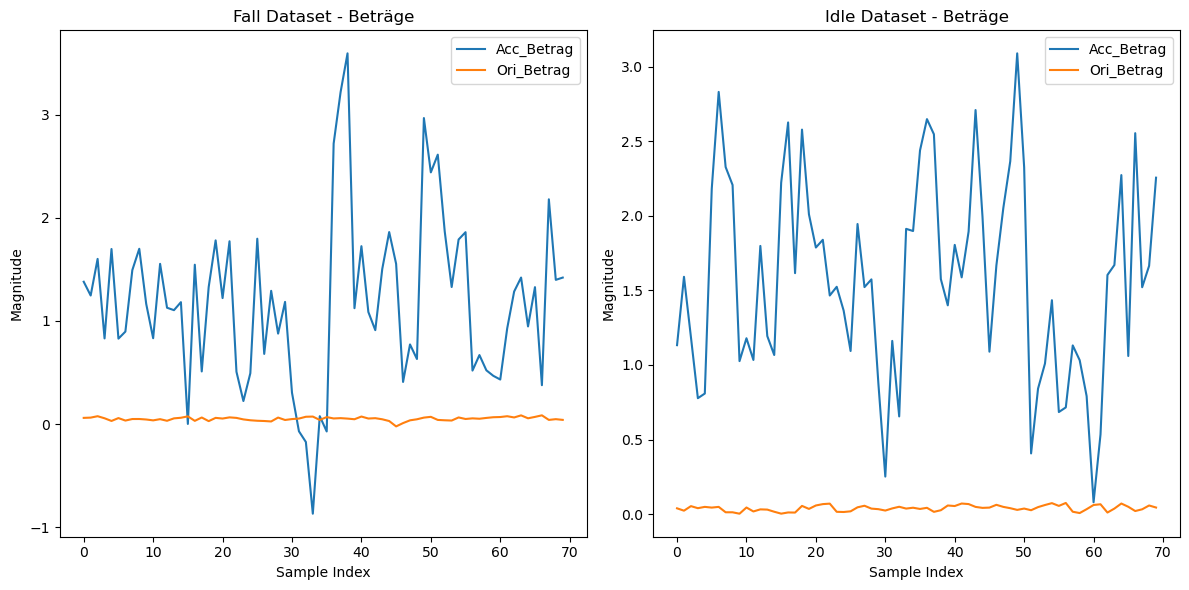

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Paths a los directorios
fall_path = '/Users/joseheinz/Documents/Arbeit/G2/Silabs/PYTHON_LOG/SVM/Datasets/acceleration/FallEnlarged'
idle_path = '/Users/joseheinz/Documents/Arbeit/G2/Silabs/PYTHON_LOG/SVM/Datasets/acceleration/IdleEnlarged'

# Cargar un archivo de cada directorio
fall_file = os.path.join(fall_path, os.listdir(fall_path)[51])  # Primer archivo de Fall
idle_file = os.path.join(idle_path, os.listdir(idle_path)[51])  # Primer archivo de Idle

# Leer los CSVs
fall_df = pd.read_csv(fall_file)
idle_df = pd.read_csv(idle_file)

# Graficar solo los 'Beträge'
plt.figure(figsize=(12, 6))

# Gráfico para Fall
plt.subplot(1, 2, 1)
plt.plot(fall_df['Acc_Betrag'], label='Acc_Betrag')
plt.plot(fall_df['Ori_Betrag'], label='Ori_Betrag')
plt.title('Fall Dataset - Beträge')
plt.xlabel('Sample Index')
plt.ylabel('Magnitude')
plt.legend()

# Gráfico para Idle
plt.subplot(1, 2, 2)
plt.plot(idle_df['Acc_Betrag'], label='Acc_Betrag')
plt.plot(idle_df['Ori_Betrag'], label='Ori_Betrag')
plt.title('Idle Dataset - Beträge')
plt.xlabel('Sample Index')
plt.ylabel('Magnitude')
plt.legend()

plt.tight_layout()
plt.show()

In [94]:
df = pd.read_csv('/Users/joseheinz/Documents/Arbeit/G2/Silabs/PYTHON_LOG/SVM/Datasets/acceleration/feature_extraction_Test.csv')
df

,File,Softmax_Fall,Softmax_Idle,Acc_Betrag_mu,Acc_Betrag_sigma,Acc_X_mu,Acc_X_sigma,Acc_Y_mu,Acc_Y_sigma,Acc_Z_mu,...,Ori_Betrag_sigma,Ori_X_mu,Ori_X_sigma,Ori_Y_mu,Ori_Y_sigma,Ori_Z_mu,Ori_Z_sigma,Acc_Betrag_Peak,Ori_Betrag_Peak,Acc_Peak_Frequency
0,data_20241229-144138.csv,0.978106,0.021894,0.692866,0.000007,0.987408,0.006507,0.867136,0.007007,-0.988195,...,0.000015,0.734894,0.000032,0.666692,0.000022,0.691493,0.048308,0.692878,0.691249,8.571429


In [99]:
df = pd.read_csv('/Users/joseheinz/Documents/Arbeit/G2/Silabs/PYTHON_LOG/SVM/Datasets/acceleration/feature_extraction.csv')
df

,File,Predicted_Label,Softmax_Fall,Softmax_Idle,Acc_Betrag_mu,Acc_Betrag_sigma,Acc_X_mu,Acc_X_sigma,Acc_Y_mu,Acc_Y_sigma,...,Ori_X_mu,Ori_X_sigma,Ori_Y_mu,Ori_Y_sigma,Ori_Z_mu,Ori_Z_sigma,Acc_Betrag_Peak,Ori_Betrag_Peak,Acc_Peak_Frequency,Label
0,data_20241228-191938_aug_13.csv,FallEnlarged,0.901566,0.098434,-0.055085,0.000261,-0.102611,0.230819,-0.142547,0.280145,...,-0.053206,0.007972,-0.056232,0.002716,-0.055224,0.009279,-0.054180,-0.055436,5.714286,FallEnlarged
1,data_20241228-191938_aug_8.csv,FallEnlarged,0.952946,0.047054,0.073782,0.000330,0.010028,0.311373,-0.050835,0.290663,...,0.074896,0.009842,0.072689,0.003847,0.071106,0.013367,0.074708,0.073421,5.714286,FallEnlarged
2,data_20241228-175547_aug_19.csv,FallEnlarged,0.950212,0.049788,-0.047468,0.000290,-0.266032,0.328078,0.134309,0.320559,...,-0.049109,0.017910,-0.050919,0.006198,-0.055694,0.017818,-0.046866,-0.047812,0.000000,FallEnlarged
3,data_20241228-175547_aug_25.csv,FallEnlarged,0.961264,0.038736,0.134953,0.000299,-0.048530,0.348859,0.314463,0.293155,...,0.138971,0.020033,0.131056,0.005780,0.127786,0.020268,0.135648,0.134555,0.000000,FallEnlarged
4,data_20241228-191813_aug_15.csv,FallEnlarged,0.907952,0.092048,-0.156740,0.000260,-0.083784,0.207522,-0.161763,0.277864,...,-0.162625,0.013920,-0.156797,0.004241,-0.160914,0.012562,-0.155826,-0.157063,7.142857,FallEnlarged
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,data_20241228-193331_aug_24.csv,IdleEnlarged,0.026018,0.973982,-0.431004,0.000331,0.032855,0.406929,-0.141417,0.399677,...,-0.437786,0.013826,-0.432553,0.005359,-0.431918,0.020676,-0.430177,-0.431548,42.857143,IdleEnlarged
996,data_20241228-193331_aug_18.csv,IdleEnlarged,0.009946,0.990054,-0.413002,0.000209,-0.152475,0.366889,-0.121786,0.365449,...,-0.418365,0.009714,-0.414471,0.004145,-0.410562,0.016578,-0.412479,-0.413392,35.714286,IdleEnlarged
997,data_20241228-193706_aug_10.csv,IdleEnlarged,0.057961,0.942039,-0.224150,0.000189,0.058306,0.275984,-0.235884,0.304423,...,-0.225210,0.012459,-0.223897,0.004569,-0.226485,0.012657,-0.223599,-0.224440,10.000000,IdleEnlarged
998,data_20241228-193137_aug_20.csv,IdleEnlarged,0.023593,0.976407,0.052777,0.000266,-0.125990,0.421355,0.246098,0.313057,...,0.052019,0.009863,0.049965,0.003645,0.050921,0.013211,0.053575,0.052301,27.142857,IdleEnlarged
